# Variables aleatorias discretas

El objetivo de este notebook es repasar algunas distribuciones de variables aleatorias **discretas** importantes, y ver en qué situaciones aparecen (lanzamientos de dados, palabras en textos).

In [96]:
# Librerías que utilizaremos
from collections import Counter

import re
import time
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

np.random.seed(1)

**Pebble World**

En un *Pebble World* consideramos un espacio muestral finito $ \Omega $ y a una ley de probabilidad $ P $.

Cada resultado en $\Omega$ es una piedrita, y $P$ asigna el tamaño o probabilidad a cada piedrita.

In [104]:
def pebble_world(resultados, probabilidades):
    '''
    Función que muestra grafico de burbuja de un espacio de probabilidad de una
    variable aleatoria discreta
    '''

    n = len(resultados)
    X = np.random.randint(1, 8000, n)
    Y = np.random.randint(1, 8000, n)
    P = np.array(probabilidades)
    color = np.random.rand(n)
    titulo = 'Pebble world'
    margen = 5
    plt.xlim(min(X) - margen, max(X)+margen)
    plt.ylim(min(X) -margen,max(X)+margen)
    plt.scatter(x=X, y=Y, s=P*10000,
                c = color, alpha=0.5)
    margen =2500
    plt.xlim(min(X)-margen, max(X)+margen)
    plt.ylim(min(X)-margen,max(X)+margen)

    plt.title(titulo)

    # Mostrar valores de los elementos
    for e, p, x, y in zip(resultados,P,X,Y):
        plt.annotate("{}".format(e),
                    xy=(x, y),
                     ha="center", va="center")


    # Eliminar texto y marcas de los ejes
    ax = plt.gca( )
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    plt.show()
     

## Distribución Bernoulli

Considera a la variable $ X \sim \text{Bernoulli}(p) $, donde $ p \in [0,1] $ es el parámetro de probabilidad de éxito.

La distribución Bernoulli modela experimentos aleatorios con solo dos posibles resultados: **éxito** (valor 1) y **fracaso** (valor 0). Es decir, el espacio muestral es: $ \Omega = \{0, 1\} $

La probabilidad de que ocurra un éxito es $ P(X = 1) = p $, mientras que la de un fracaso es $ P(X = 0) = 1 - p $.


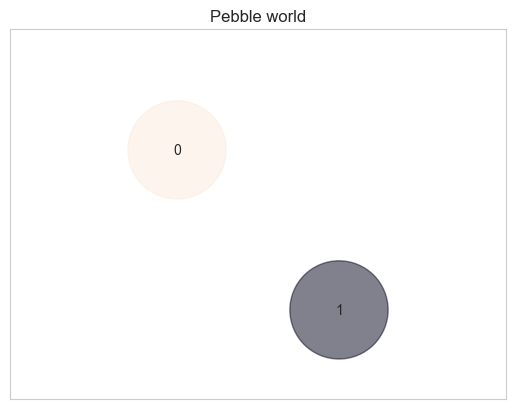

In [110]:
# Por ejemplo, lanzar una moneda honesta
Omega = [0, 1]
P = [1/2, 1/2]
pebble_world(Omega, P)

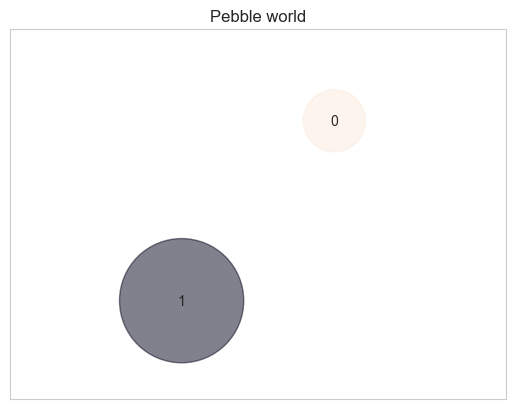

In [108]:
# Por ejemplo, lanzar una moneda cargada
Omega = [0, 1]
P = [1/5, 4/5]
pebble_world(Omega, P)

/var/folders/_2/ssn9p4gn1zq96vptrk6db0940000gn/T/ipykernel_21621/3803641787.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valores, y=probabilidades, palette="pastel")


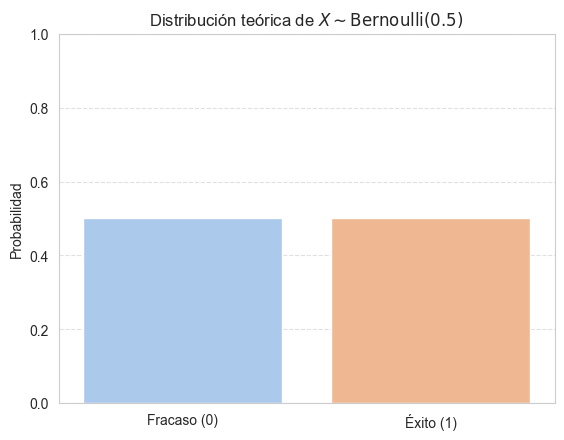

In [87]:
# Distribución teórica
p = 0.5

valores = [0, 1]
probabilidades = [1 - p, p]

sns.barplot(x=valores, y=probabilidades, palette="pastel")
plt.xticks([0, 1], ["Fracaso (0)", "Éxito (1)"])
plt.title("Distribución teórica de $X \\sim \\text{Bernoulli}(0.5)$")
plt.ylabel("Probabilidad")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [88]:
# Distribución empírica
p = 0.5
n = 100

resultados = np.random.binomial(n=1, p=p, size=n)

conteo_exito = 0
conteo_fracaso = 0

for i in range(n):
    clear_output(wait=True)
    resultado_actual = resultados[i]

    if resultado_actual == 1:
        conteo_exito += 1
    else:
        conteo_fracaso += 1

    frec_exito = conteo_exito / (i+1)
    frec_fracaso = conteo_fracaso / (i+1)

    print(f"Ensayo {i+1}: {'Éxito (1)' if resultado_actual==1 else 'Fracaso (0)'}")
    print(f"Frecuencias empíricas hasta ahora -> Éxito: {frec_exito:.3f}, Fracaso: {frec_fracaso:.3f}")

    time.sleep(0.1)

Ensayo 100: Éxito (1)
Frecuencias empíricas hasta ahora -> Éxito: 0.560, Fracaso: 0.440


In [91]:
conteo_exito = np.cumsum(resultados)
conteo_fracaso = np.cumsum(1 - resultados)
frecuencias_exito = conteo_exito / (np.arange(1, n+1))
frecuencias_fracaso = conteo_fracaso / (np.arange(1, n+1))

fig, ax = plt.subplots(figsize=(6,4))
sns.set_style("whitegrid")
bar_container = ax.bar([0, 1], [0, 0], color=sns.color_palette("pastel", 2))
ax.set_xticks([0, 1])
ax.set_xticklabels(["Fracaso (0)", "Éxito (1)"])
ax.set_ylim(0, 1)
ax.set_ylabel("Frecuencia relativa")
title = ax.set_title("")

indices_ida = list(range(n))

def update(frame):
    i = indices_ida[frame % len(indices_ida)]
    bar_container[0].set_height(frecuencias_fracaso[i])
    bar_container[1].set_height(frecuencias_exito[i])
    title.set_text(f"Distribución empírica después de {i+1} ensayos")
    return bar_container

ani = FuncAnimation(fig, update, frames=len(indices_ida), interval=200, blit=False, repeat=True)

plt.close(fig)

HTML(ani.to_jshtml())


## Distribución Uniforme

Considera a la variable $ X \sim \text{Uniforme}(\{x_1, x_2, \dots, x_n\}) $, donde cada valor $ x_i $ pertenece a un conjunto finito de posibles resultados.

La distribución uniforme discreta modela experimentos aleatorios en los que **todos los resultados son igualmente probables**. Es decir, el espacio muestral es finito y la probabilidad de cada resultado es la misma: $ P(X = x_i) = \frac{1}{n} $ para todo $ i = 1, \dots, n $.

Esta distribución se utiliza cuando no hay razones para favorecer un resultado sobre otro, como al lanzar un dado justo de seis caras: $ X \sim \text{Uniforme}(\{1, 2, 3, 4, 5, 6\}) $.

Otro ejemplo es lanzar dos dados: $ X \sim \text{Uniforme}(\{(1,1), (1,2), \dots, (6,6)\}) $.

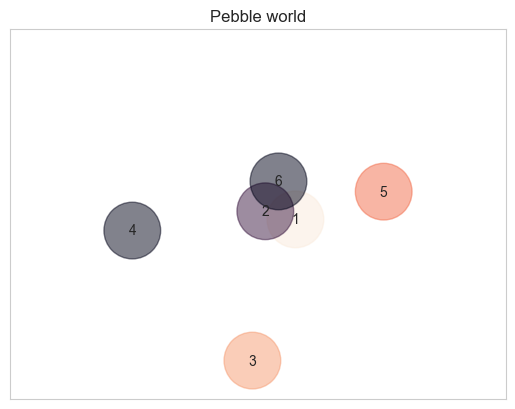

In [105]:
# Por ejemplo, lanzar un dado de 6 caras
Omega = [1, 2, 3, 4, 5, 6]
P = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
pebble_world(Omega, P)

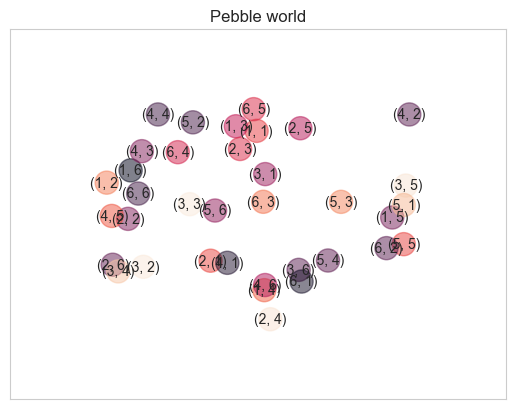

In [106]:
# Por ejemplo, lanzar dos dados
dado = [1, 2, 3, 4, 5, 6]

Omega = list(itertools.product(dado, repeat=2))
P = list(itertools.repeat(1/36,36))

pebble_world(Omega, P)


/var/folders/_2/ssn9p4gn1zq96vptrk6db0940000gn/T/ipykernel_21621/1898537637.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(n)), y=probabilidades, palette="pastel")


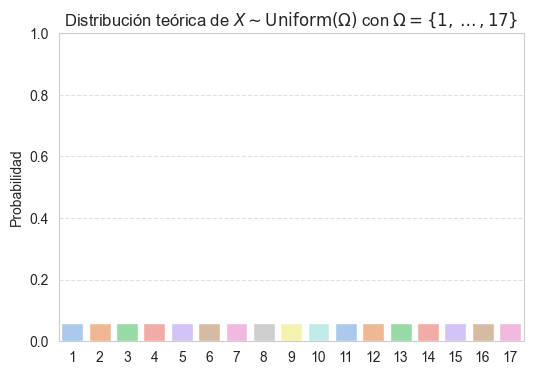

In [116]:
# Distribución teórica
n = 17 # Tamaño de Omega

valores = list(range(1, n + 1))
probabilidades = [1 / n] * n
plt.figure(figsize=(6, 4))
sns.barplot(x=list(range(n)), y=probabilidades, palette="pastel")
plt.xticks(ticks=list(range(n)), labels=[str(v) for v in valores])
plt.title(f"Distribución teórica de $X \\sim \\text{{Uniform}}(\\Omega)$ con $\\Omega = \\{{1,\\dots,{n}\\}}$")
plt.ylabel("Probabilidad")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# Distribución empírica
n = 17                
num_trials = 100     

resultados = np.random.randint(1, n+1, size=num_trials)
conteos = np.zeros((n, num_trials))
for k in range(1, n+1):
    conteos[k-1] = np.cumsum(resultados == k)

# Frecuencias relativas
frecuencias = conteos / np.arange(1, num_trials + 1)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(6, 4))
bar_container = ax.bar(list(range(n)), [0] * n, color=sns.color_palette("pastel", n))
ax.set_xticks(list(range(n)))
ax.set_xticklabels([str(i) for i in range(1, n + 1)])
ax.set_ylim(0, 1)
ax.set_ylabel("Frecuencia relativa")
title = ax.set_title("")

def update(frame):
    for i, bar in enumerate(bar_container):
        bar.set_height(frecuencias[i, frame])
    ensayos = frame + 1
    title.set_text(f"Distribución empírica después de {ensayos} ensayos")
    return bar_container

ani = FuncAnimation(fig, update, frames=num_trials, interval=100, blit=False, repeat=True)

plt.close(fig)

HTML(ani.to_jshtml())

## Distribución triangular

Considera la variable $ Z = X + Y $, donde $ X $ y $ Y $ son variables independientes y uniformes discretas en el conjunto $ \{1, 2, 3, 4, 5, 6\} $.

La variable $ Z $ representa la suma de las caras de dos dados justos.

La distribución de $ Z $ no es uniforme, sino que sigue una forma conocida como **distribución triangular discreta**, caracterizada por tener mayor probabilidad en los valores centrales y menor en los extremos. El espacio muestral de $ Z $ es $ \{2, 3, 4, \dots, 12\} $. 

In [74]:
# Por ejemplo, la suma de dos dados

## Distribución binomial

Considera a la variable $ X \sim \text{Binomial}(n, p) $, donde $ n $ es el número de ensayos independientes (de tipo Bernoulli) y $ p \in [0,1] $ es la probabilidad de éxito en cada uno.

La probabilidad de observar exactamente $ k $ éxitos está dada por:
$ P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}, \quad \text{para } k = 0, 1, \dots, n $

Un ejemplo clásico es lanzar una moneda justa $ n $ veces y contar cuántas veces sale cara. En este caso, cada lanzamiento es un ensayo Bernoulli con $ p = 0.5 $, y la variable que cuenta el número de caras es: $ X \sim \text{Binomial}(n, 0.5) $


## Distribución multinomial

## Histogramas: observando distribuciones de los datos

El histograma de palabras en un texto representa las frecuencias de cada palabra, pero estas no suelen seguir una distribución simple y conocida.

Las palabras en un texto tienen dependencias complejas y distribuciones sesgadas, como la ley de Zipf, que hace que algunas palabras sean muy frecuentes y otras muy raras.

Por ello, el histograma es una variable empírica que refleja la estructura del texto que observamos a través de los datos.


In [75]:
# Por ejemplo, considera al Quijote

/var/folders/_2/ssn9p4gn1zq96vptrk6db0940000gn/T/ipykernel_21621/2535234573.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(vocabulario), y=list(frecuencias), palette='viridis')


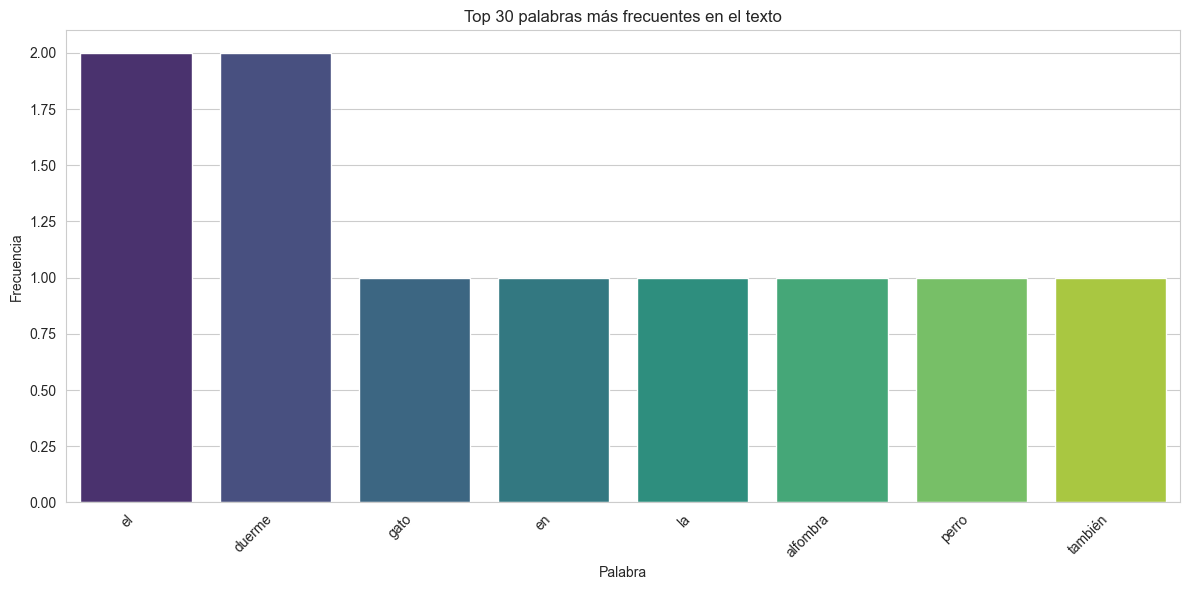

In [76]:
libro = "El gato duerme en la alfombra. El perro también duerme"

palabras = re.findall(r'\b\w+\b', libro.lower())

# Contar frecuencias
conteo = Counter(palabras)

# Obtener las n palabras más comunes
n = 30
palabras_mas_comunes = conteo.most_common(n)
vocabulario, frecuencias = zip(*palabras_mas_comunes)

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x=list(vocabulario), y=list(frecuencias), palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title(f"Top {n} palabras más frecuentes en el texto")
plt.xlabel("Palabra")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()